In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
# Read in data
IMDB_Data = pd.read_csv("https://raw.githubusercontent.com/Mcpaeis/code-s/master/IMDB-Movie-Data.csv", sep=",", header=0)

---
---

## Introduction

---
---




1.   Univariate Exploratory Data Analysis
2.   Multivariate Exploratory Data Analysis





---
---

## Goal of EDA

---
---

* Detection of mistakes
* Checking of assumptions
* Preliminary selection of appropriate models
* Determining relationships among explanatory variables
* Assessing the direction and rough size of relationships between explanatory
and outcome variables

---
---

## Data Types & Handling Missing Values

---
---

* Catgorical Data
* Quantitaive Data

In [ ]:
IMDB_Data.isnull().sum()
# IMDB_Data.isna().sum() -- You can also use

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [ ]:
# Remove all NA (missing) values
IMDB_Data.dropna(inplace=True)
IMDB_Data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [ ]:
IMDB_Data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


---
---

## Visualizing Distributions

---
---

#### Categorical Data

Text(0, 0.5, 'Count')

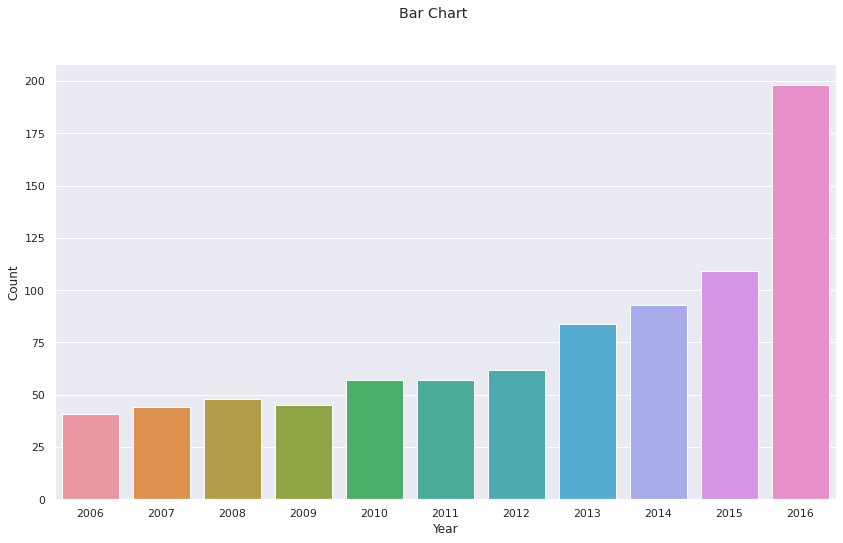

In [ ]:
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle('Bar Chart')
sns.countplot(x="Year", ax = ax, data=IMDB_Data)
ax.set_xlabel("Year")
ax.set_ylabel("Count")

In [ ]:
def makeBarChart(variable, data):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  fig.suptitle('Bar Chart of ' + variable)
  sns.countplot(x=variable, ax = ax, data=data)
  ax.set_xlabel(variable)
  ax.set_ylabel("Count")


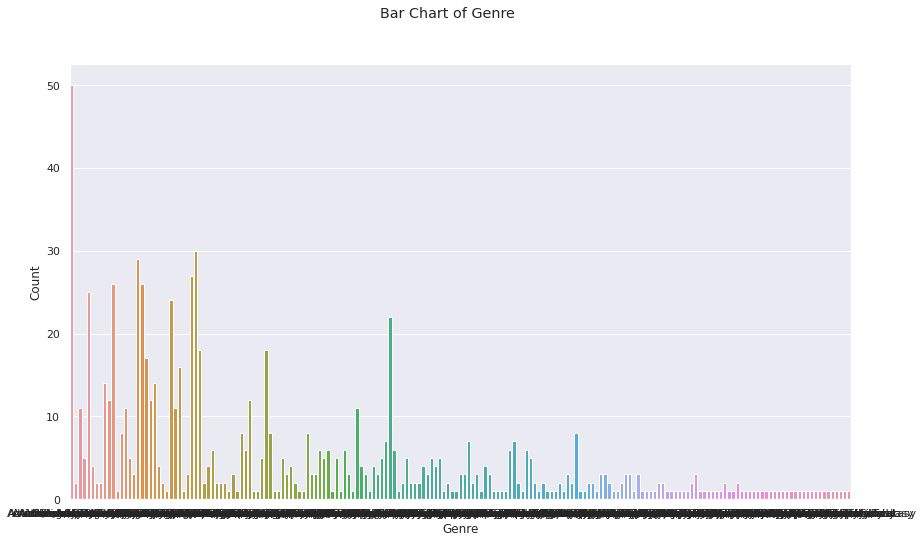

In [ ]:
makeBarChart('Genre', IMDB_Data)

In [ ]:
# Take the first genre for each movie
IMDB_Data[['Genre1', 'Genre2', 'Genre3']] = IMDB_Data.Genre.str.split(",",expand=True) 

In [ ]:
IMDB_Data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,Anya Taylor-Joy
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto


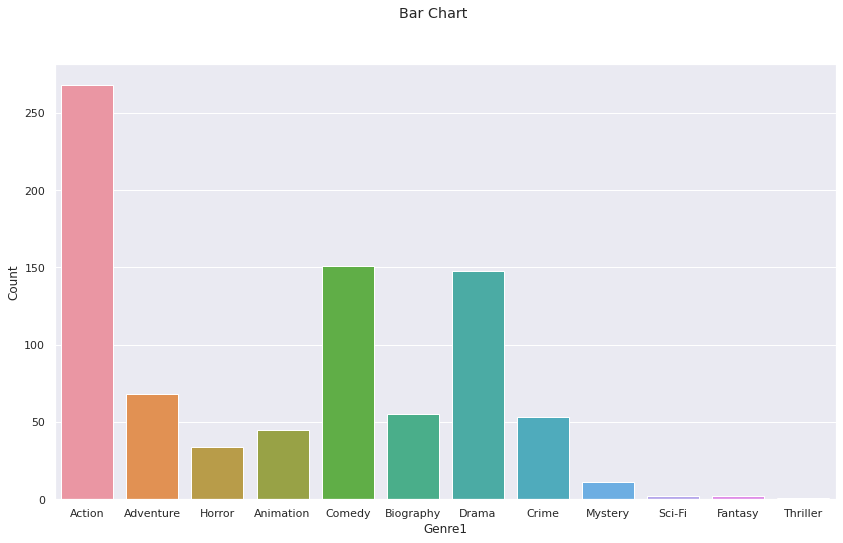

In [ ]:
# Make the bar chart again
makeBarChart('Genre1', IMDB_Data)

In [ ]:
# Split Actor Category
IMDB_Data[['Actor1', 'Actor2']] = IMDB_Data.Actors.str.split(",",expand=True)[[0, 1]]
IMDB_Data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,Anya Taylor-Joy
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto


#### Continuous Data - A type of quantitative data

In [ ]:
# Look at the distribution of ratings
def makeHistogram(variable, data):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  fig.suptitle('Histogram of ' + variable)
  sns.distplot(data[variable])
  ax.set_xlabel(variable)
  ax.set_ylabel("Relative Frequency")

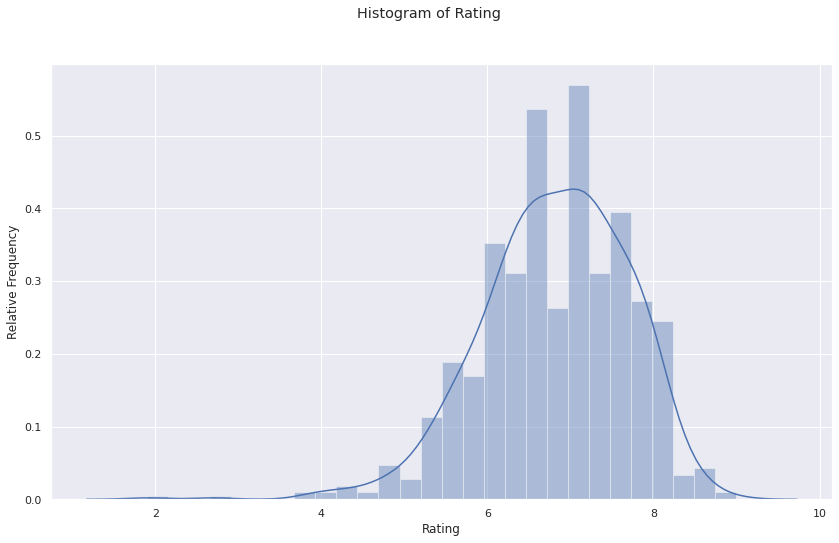

In [ ]:
makeHistogram('Rating', IMDB_Data)

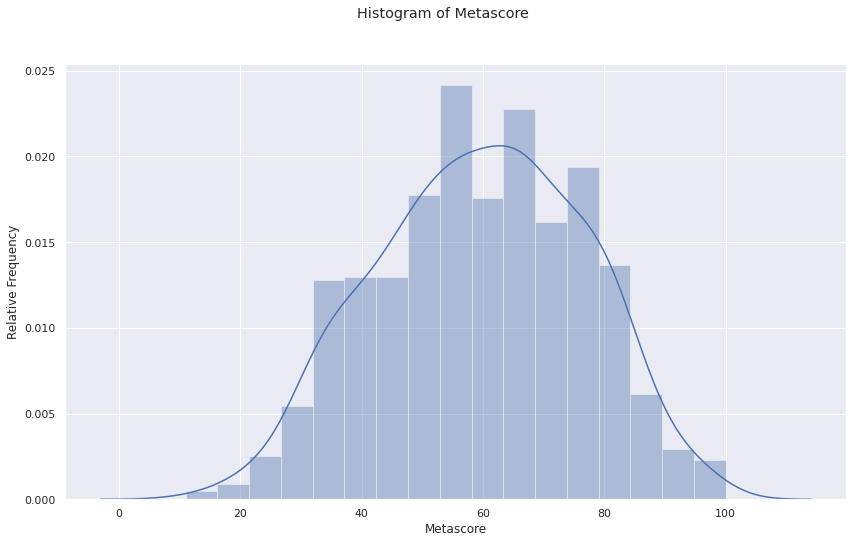

In [ ]:
makeHistogram('Metascore', IMDB_Data)

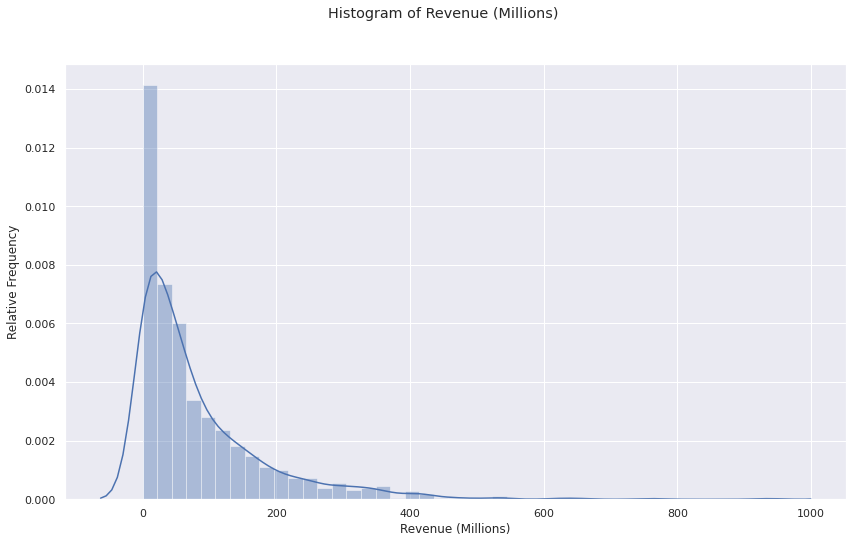

In [ ]:
makeHistogram('Revenue (Millions)', IMDB_Data)

In [ ]:
# Some movies have negative revenue
IMDB_Data[(IMDB_Data['Revenue (Millions)'] <= 0)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre1,Genre2,Genre3,Actor1,Actor2
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0,Crime,Drama,Thriller,Patrick Wilson,Jessica Biel


----
----

### Covariation

---
---

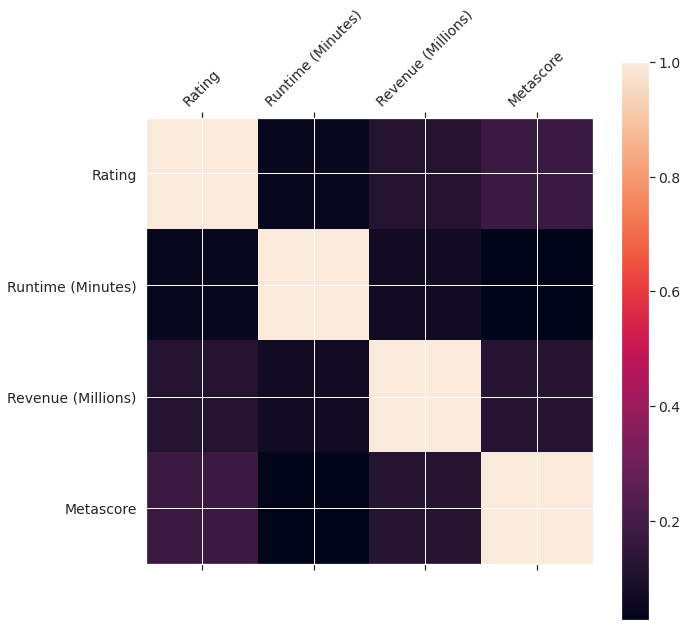

In [ ]:
# Compute the correlation values
IMDB_Data_corr = IMDB_Data[['Rating', 'Runtime (Minutes)', 'Revenue (Millions)', 'Metascore']]
IMDB_corr = IMDB_Data_corr.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# Make the plot
f = plt.figure(figsize=(10, 10))
plt.matshow(IMDB_corr, fignum=f.number)
plt.xticks(range(IMDB_corr.shape[1]), IMDB_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(IMDB_corr.shape[1]), IMDB_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()
# Pearson correlation measures a linear relationship

---
---

### Categorical and Continuous Variables

---
---

In [ ]:
def makeBoxPlot(x, y, data):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  fig.suptitle('Boxplot of ' + x +' and ' +y)
  sns.boxplot(x=x, y=y, data=data)
  ax.set_xlabel(x)
  ax.set_ylabel(y)

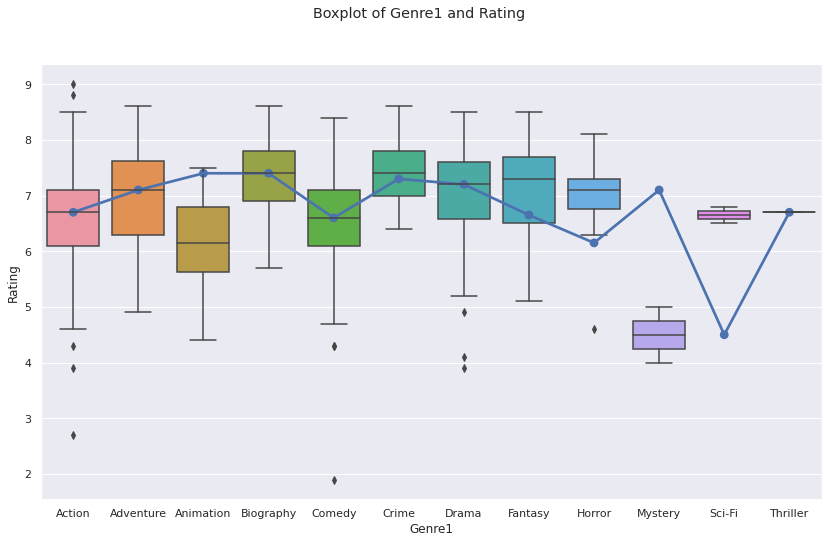

In [ ]:
makeBoxPlot('Genre1', 'Rating', IMDB_Data)

---
---

### Two Continuous Variables

---
---

In [ ]:
def makeScatterPlot(x, y, data, typ='scatter'):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  fig.suptitle('Scatter plot of ' + x +' and ' +y)
  if typ=='scatter':
    sns.scatterplot(x=x, y=y, data=data)
  else:  
    sns.pointplot(x=x, y=y, data=data)
  ax.set_xlabel(x)
  ax.set_ylabel(y)

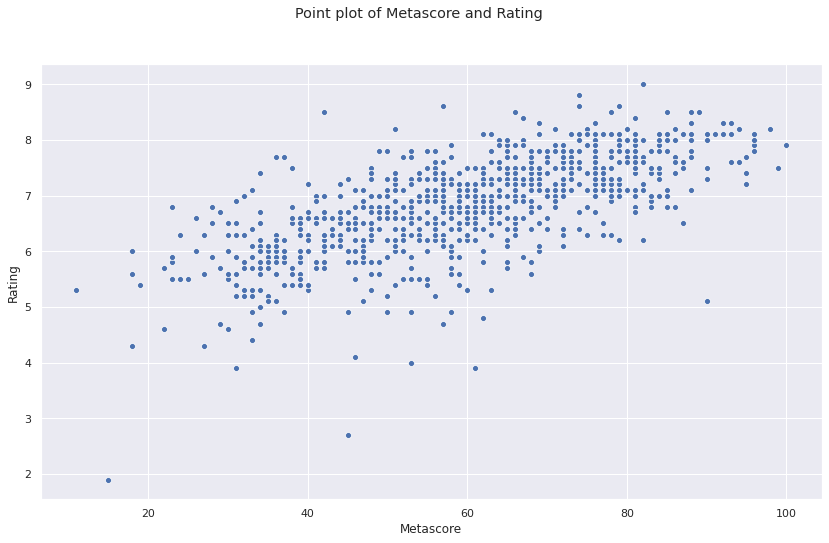

In [ ]:
makeScatterPlot('Metascore', 'Rating', IMDB_Data)

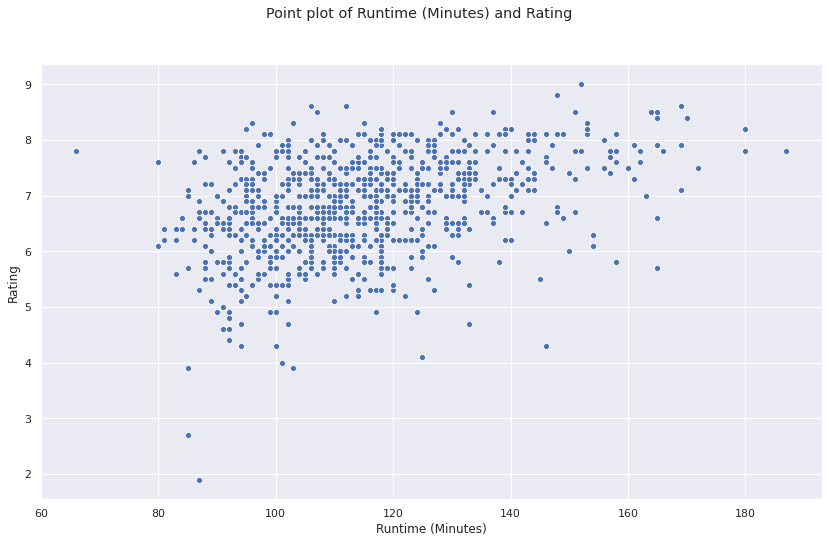

In [ ]:
makeScatterPlot('Runtime (Minutes)', 'Rating', IMDB_Data)